The Hack Oregon Fall/Winter 2016/2017 Housing project worked with the Portland Housing Bureau to obtain a set of data from a survey of owners and renters of housing on a variety of topics. The data was collected by a company under contract and the data was provided in a set of Microsoft Excel workbooks which can be found in the same directory as this notebook. A summary of the survey method and weighting of the data is also provided as a pdf in this directory.

In [78]:
import xlrd
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def clearlist(l):
    while len(l) > 0:
        l.pop()


def getcell(sheet, row, col):
    cell_obj = sheet.cell(row, col)
    dtype = xlrd.sheet.ctype_text.get(cell_obj.ctype,'unknown')
    if (dtype == 'text'):
        cell = cell_obj.value.strip()
        if cell == '-':
            cell = 0
            dtype = 'number'
    else:
        cell = cell_obj.value
    return cell, dtype


def open_workbook(inputfile):
    return xlrd.open_workbook(inputfile)


def read_question_data(x1_sheet, header, question):
    rowtotal = x1_sheet.nrows
    coltotal = x1_sheet.ncols
    startReport = False
    startQuestion = False
    lol = []
    rowindex = []
    rowlist = []
    for row in range(0, rowtotal):
        cell, dtype = getcell(x1_sheet,row,1)
        if (dtype == 'text'):
            if "Q" in cell and \
                "Comparison" not in cell and\
                "Table" not in cell:
                if question in cell:
                    startQuestion = True
                else:
                    startQuestion = False
            elif "Comparison Groups" in cell:
                # table completed
                if startQuestion == True: 
                    return pd.DataFrame(lol,index=rowindex,columns=header)
                startReport = False
            elif "Total" in cell:
                startReport = True
            if startReport == True and startQuestion == True:
                for col in range(1,coltotal):
                    cell, dtype = getcell(x1_sheet,row,col)
                    if col == 1:
                        rowindex.append(cell)
                    elif cell != '':
                        rowlist.append(cell)
                lol.append(copy.copy(rowlist))
                clearlist(rowlist)


def get_question(x1_sheet, questions):
    print("Questions are {}".format(questions))
    question = input("Which question do you want to visualize? ")
    question_text = ''
    rowtotal = x1_sheet.nrows
    question_row = False
    startQuestion = False
    for row in range(0, rowtotal):
        cell, dtype = getcell(x1_sheet,row,1)
        if (dtype == 'text'):
            if "Q" in cell and \
                "Comparison" not in cell and\
                "Table" not in cell:
                #print ("Line %d Question %s" % (i, cell))
                question_row = True
                if question in cell:
                    startQuestion = True
                    question_text = cell
                else:
                    startQuestion = False
            elif question_row == True:
                if startQuestion == True:
                    if cell != '':
                        question_text += ' ' + cell
                    else:
                        return list([question, question_text])
            else:
                question_row = False


In [79]:
inputfile_path = './/'
questions = "1,2A,2C,3A,4,5,6,7,9r[a-o],10,14r[1-5],15r[a-l],16,\
17r[a-z],18[AB],19,20[A-D],21,23,25r[a-q],27r[a-d],28A,28[BCD]_CD,\
26r[a-f],29r[a-g],30,31,32,33,34,34A_CD,35r[a-j],36r[a-n],37r[a-j]\
39r[a-j],40,41,42,43,44,45,46,47"


In [80]:
region = input("Which region? (1- Portland, 2- Gresham, or 3- East Multnomah County) ")
if region == '1':
    inputfile_path += "PHB_Portland "
elif region == '2':
    inputfile_path += "PHB_Gresham "
elif region == '3':
    inputfile_path += "PHB_E_ Mult "

Which region? (1- Portland, 2- Gresham, or 3- East Multnomah County) 3


In [81]:
classes = input("1- Main or 2- Protected classes? ")
if classes == '1':
    inputfile_path += "(Main)_September 7 2016.xlsx"
    header = ['Total','Under25','25to34','35to44','45to54','55to64','65+','Mult','Clack','Wash','OtherCounty'\
            ,'PDX','notPDX','North',"NE",'NW','SE','SW','Own','Rent','Other']
elif classes == '2':
    inputfile_path += "(P Classes)_September 7 2016.xlsx"
    header = ['Total','White','Nonwhite','NonUSOrgin','USOrgin','JustMe','HaveKids','NoKids','Married','NotMarried'\
    ,'Disabled','NotDisabled','Religious','NotReligious','Male','Female','OtherGender','OtherIncome','NoOtherIncome'\
    ,'PaidCash','NotPaidCash']


1- Main or 2- Protected classes? 1


In [82]:
workbook = open_workbook(inputfile_path)
x1_sheet = workbook.sheet_by_index(0)
question = get_question(x1_sheet,questions)
question[1]

Questions are 1,2A,2C,3A,4,5,6,7,9r[a-o],10,14r[1-5],15r[a-l],16,17r[a-z],18[AB],19,20[A-D],21,23,25r[a-q],27r[a-d],28A,28[BCD]_CD,26r[a-f],29r[a-g],30,31,32,33,34,34A_CD,35r[a-j],36r[a-n],37r[a-j]39r[a-j],40,41,42,43,44,45,46,47
Which question do you want to visualize? 37rb


"Q37rb.  Based on your opinion of your neighborhood's needs, what level of priority would you place on the following infrastructure improvements?   Repair existing sidewalks"

In [83]:
frame = read_question_data(x1_sheet, header, question[0])
frame

,Total,Under25,25to34,35to44,45to54,55to64,65+,Mult,Clack,Wash,...,PDX,notPDX,North,NE,NW,SE,SW,Own,Rent,Other
Total,1674.0,17.0,298.0,481.0,355.0,276.0,208.0,1674.0,0,0,...,1643.0,31.0,355.0,570.0,0,718.0,0,1127.0,544.0,0
Low Priority,640.0,8.0,119.0,188.0,155.0,102.0,54.0,640.0,0,0,...,629.0,11.0,138.0,218.0,0,273.0,0,438.0,200.0,0
Medium Priority,628.0,1.0,116.0,183.0,132.0,99.0,85.0,628.0,0,0,...,615.0,13.0,137.0,214.0,0,264.0,0,412.0,215.0,0
High Priority,406.0,8.0,63.0,110.0,68.0,75.0,69.0,406.0,0,0,...,399.0,7.0,80.0,138.0,0,181.0,0,277.0,129.0,0
I Don't Know / Not Applicable,54.0,0.0,6.0,19.0,9.0,9.0,10.0,54.0,0,0,...,52.0,2.0,9.0,26.0,0,17.0,0,32.0,22.0,0
No Answer,76.0,3.0,20.0,21.0,15.0,6.0,7.0,76.0,0,0,...,75.0,1.0,4.0,6.0,0,65.0,0,7.0,68.0,0


In [84]:
if classes == '1':
    age_group = pd.DataFrame(frame, columns=header[1:7])
else:
    white = pd.DataFrame(frame, columns=header[1:3])

In [85]:
if classes == '1':
    age_group
else:
    white

In [86]:
if classes == '1':
    fig, axes = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(12, len(frame.columns)*1.5))
else:
    fig, axes = plt.subplots(nrows=10, ncols=1, sharex=True, figsize=(12, len(frame.columns)*1.5))

In [87]:
if classes == '1':
    age_group.plot(kind="barh",stacked=True, ax=axes[0], title="Age Group")
else:
    white.plot(kind="barh",stacked=True, ax=axes[0], title="Race/Color")

In [88]:
if classes == '1':
    pd.DataFrame(frame, columns=header[0:1]).plot(kind="barh",stacked=True, ax=axes[5], title="Total")
    pd.DataFrame(frame, columns=header[7:10]).plot(kind="barh",stacked=True, ax=axes[1], title="County")
    pd.DataFrame(frame, columns=header[10:12]).plot(kind="barh",stacked=True, ax=axes[2], title="Portland?")
    pd.DataFrame(frame, columns=header[12:16]).plot(kind="barh",stacked=True, ax=axes[3], title="Portland Region")
    pd.DataFrame(frame, columns=header[16:]).plot(kind="barh",stacked=True, ax=axes[4], title="Own or Rent?")
else:
    pd.DataFrame(frame, columns=header[0:1]).plot(kind="barh",stacked=True, ax=axes[9], title="Total")
    pd.DataFrame(frame, columns=header[3:5]).plot(kind="barh",stacked=True, ax=axes[1], title="National Origin")
    pd.DataFrame(frame, columns=header[5:8]).plot(kind="barh",stacked=True, ax=axes[2], title="Family")
    pd.DataFrame(frame, columns=header[8:10]).plot(kind="barh",stacked=True, ax=axes[3], title="Marital Status")
    pd.DataFrame(frame, columns=header[10:12]).plot(kind="barh",stacked=True, ax=axes[4], title="Disability")
    pd.DataFrame(frame, columns=header[12:14]).plot(kind="barh",stacked=True, ax=axes[5], title="Religion")
    pd.DataFrame(frame, columns=header[14:17]).plot(kind="barh",stacked=True, ax=axes[6], title="Gender Identity")
    pd.DataFrame(frame, columns=header[17:19]).plot(kind="barh",stacked=True, ax=axes[7], title="Other Income")
    pd.DataFrame(frame, columns=header[19:]).plot(kind="barh",stacked=True, ax=axes[8], title="Paid in Cash?")

In [89]:
question[1]

"Q37rb.  Based on your opinion of your neighborhood's needs, what level of priority would you place on the following infrastructure improvements?   Repair existing sidewalks"

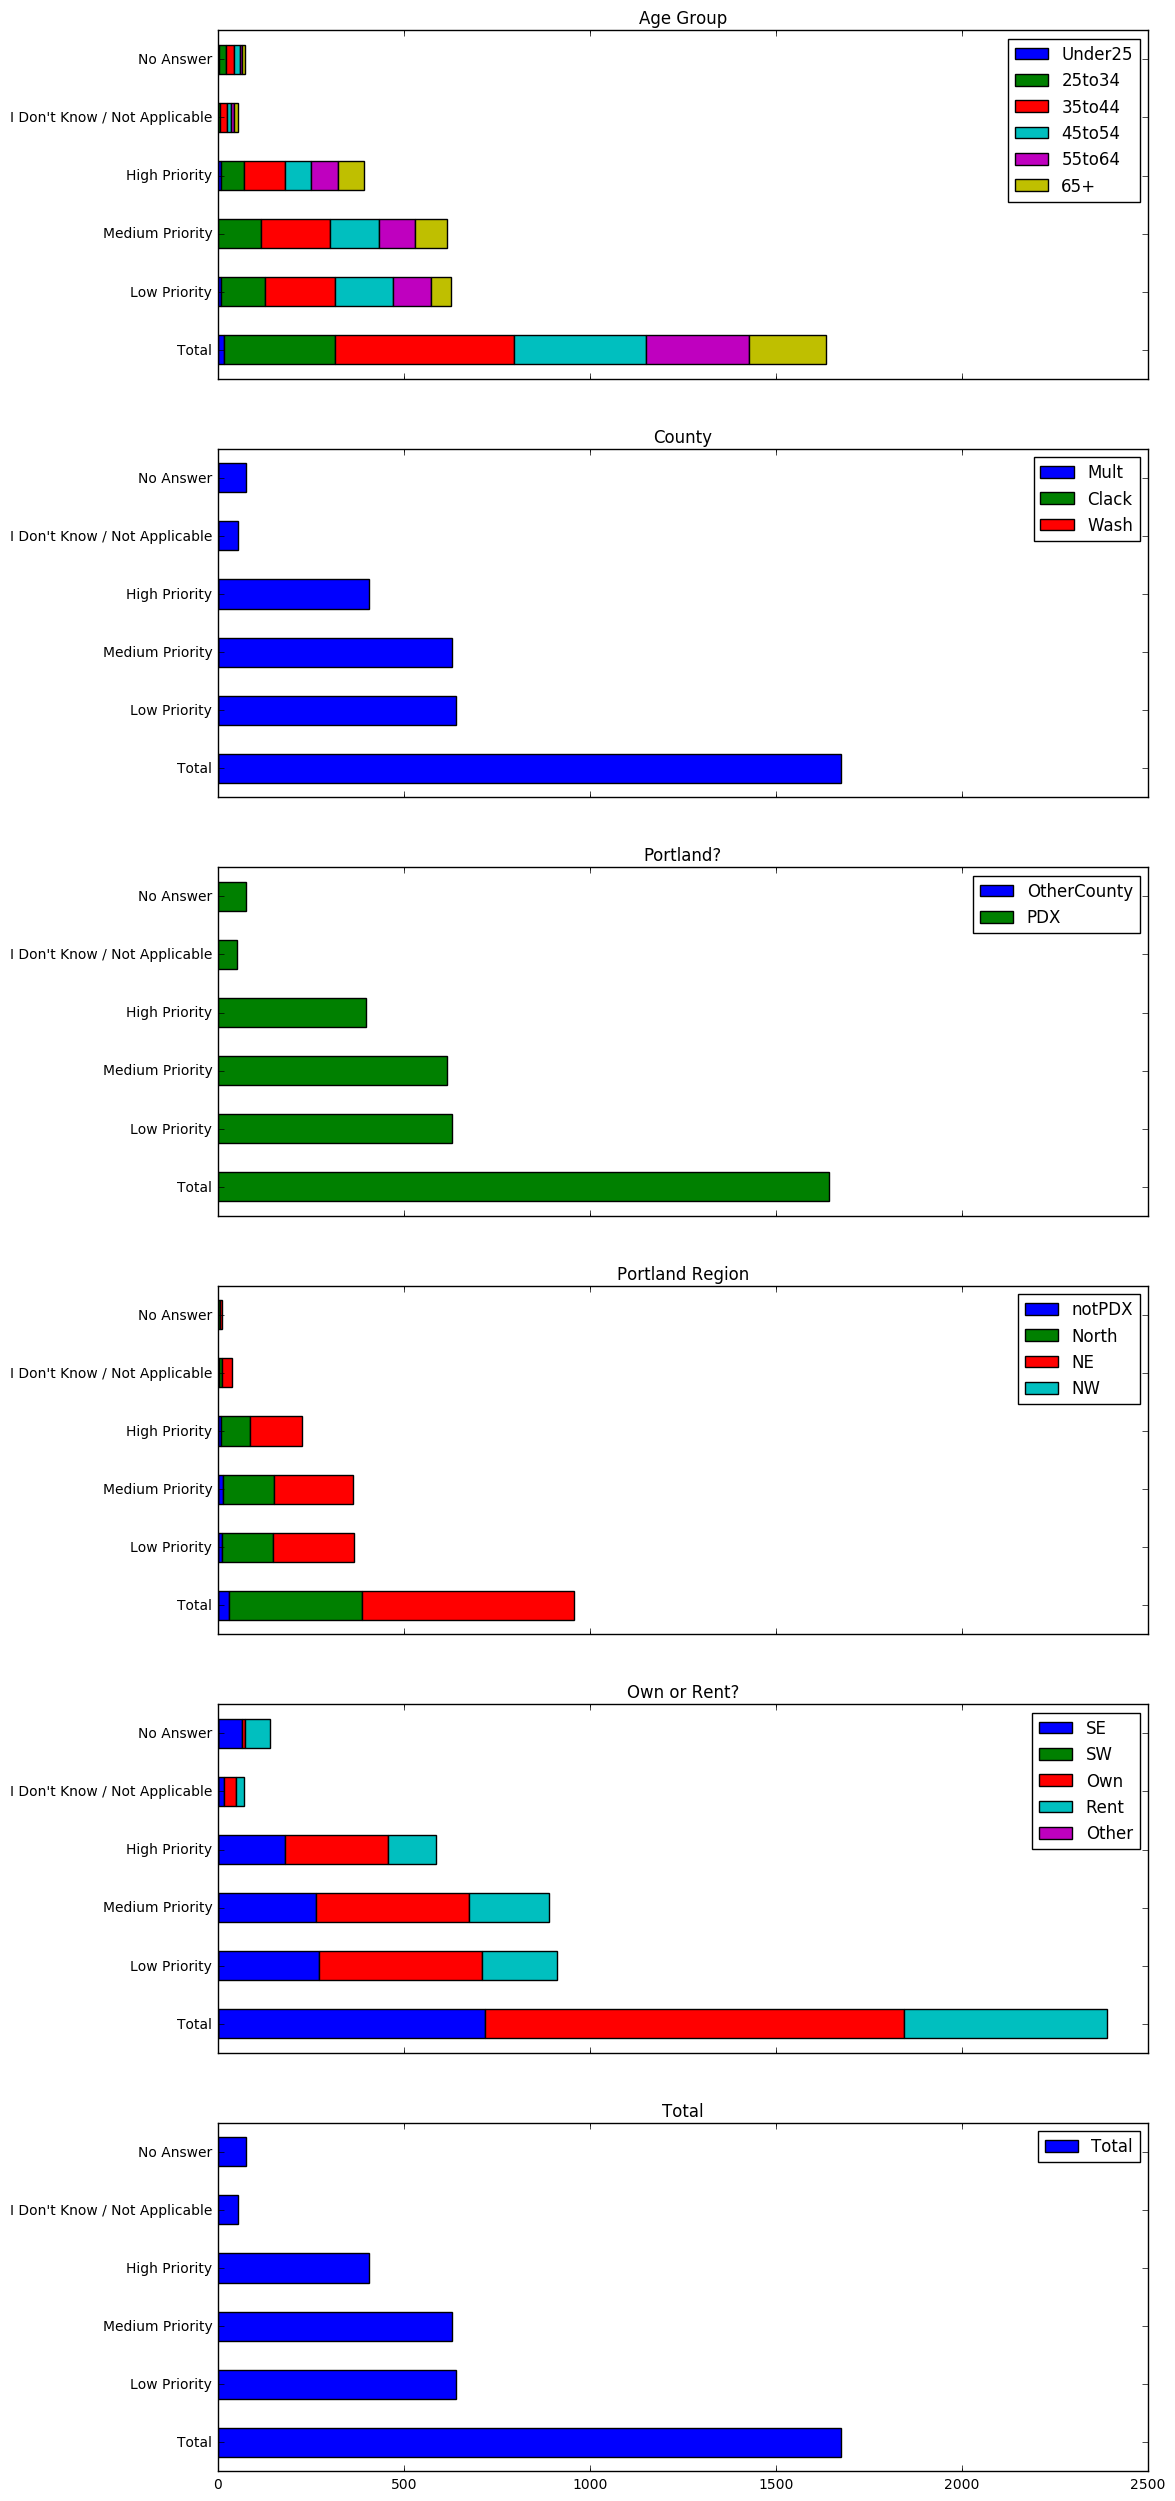

In [90]:
plt.show()